# 验证旋度的基本定理

首先还是给出一个无旋场，验证旋度基本定理

矢量场：


N.i + 2*N.j + 3*N.k

矢量场的旋度：


0

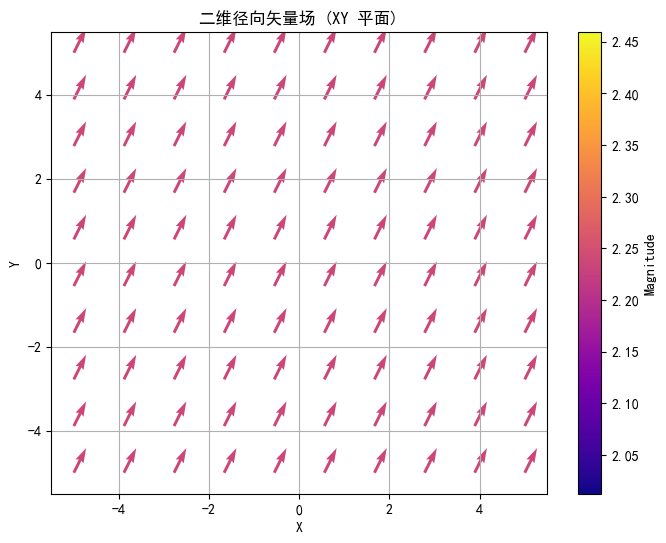

In [1]:
import numpy as np
import sympy as sp
from sympy.vector import CoordSys3D, curl
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib import rcParams
# 设置字体，防止中文乱码
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号无法正常显示的问题

# 定义矢量场函数
def vector_field(x_vals, y_vals, z_vals):
    
    # 创建一个三维坐标系
    N = CoordSys3D('N')
    # 定义矢量场
    A = 1 * N.i + 2 * N.j + 3 * N.k
    print('矢量场：')
    display(A)
    
    # 计算矢量场的旋度
    curl_A = curl(A)
    print('矢量场的旋度：')
    display(curl_A)
    
    # 提取矢量场 A 在 x, y, z 方向的分量
    Ax = A & N.i
    Ay = A & N.j
    Az = A & N.k
    # 计算 x, y, z 方向的分量
    A_x = np.zeros_like(x_vals, dtype=float)
    A_y = np.zeros_like(y_vals, dtype=float)
    A_z = np.zeros_like(z_vals, dtype=float)
    
    for i in range(x_vals.shape[0]):
        for j in range(x_vals.shape[1]):
            for k in range(x_vals.shape[2]):
                A_x[i, j, k] = float(Ax.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_y[i, j, k] = float(Ay.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_z[i, j, k] = float(Az.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
    return A_x, A_y, A_z

# 创建网格点
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
z = np.linspace(1, 1, 1)
X, Y, Z = np.meshgrid(x, y, z)

# 计算每个网格点的矢量场分量
A_x, A_y, A_z = vector_field(X, Y, Z)

# 绘制矢量场
plt.figure(figsize=(8, 6))
plt.quiver(X[:, :, 0], Y[:, :, 0], A_x[:, :, 0], A_y[:, :, 0], np.sqrt(A_x[:, :, 0]**2 + A_y[:, :, 0]**2), cmap='plasma')
plt.colorbar(label='Magnitude')
plt.title('二维径向矢量场 (XY 平面)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [4]:
# 创建一个三维坐标系
N = CoordSys3D('N')
# 定义矢量场
A = 1 * N.i + 2 * N.j + 3 * N.k
print('矢量场：')
display(A)

# 计算矢量场的旋度
curl_A = curl(A)
print('矢量场的旋度：')
display(curl_A)

矢量场：


N.i + 2*N.j + 3*N.k

矢量场的旋度：


0

In [5]:
# 计算矢量场沿着圆周线的线积分 ∫∇f · dr
# 定义路径参数化
t = sp.symbols('t')
x_t = 5 * sp.cos(t)
y_t = 5 * sp.sin(t)
z_t = 0  # 在平面上的路径

# 将路径参数化代入梯度场
A_along_path = A.subs({N.x: x_t, N.y: y_t, N.z: z_t})
print('路径上的矢量场')
display(A_along_path)

# 计算路径的微分元素 dr/dt
dx_dt = sp.diff(x_t, t)
dy_dt = sp.diff(y_t, t)
dz_dt = sp.diff(z_t, t)

# 微分向量 dl
dl = dx_dt * N.i + dy_dt * N.j + dz_dt * N.k

print('路径上的微元：')
display(dl)

# 计算梯度场与路径微分 dr 的点积
integrand = A_along_path.dot(dl)
print('最后的被积函数的形式：')
display(integrand)

# 计算线积分 ∫∇f · dr，积分范围 t ∈ [0, π]
line_integral_symbolic = sp.simplify(sp.integrate(integrand, (t, 0, 2*  sp.pi)))

# 输出符号线积分结果
print("\n符号线积分结果:")
sp.pprint(line_integral_symbolic)

# 计算具体数值
line_integral_numeric = line_integral_symbolic.evalf(chop=True)

print("\n线积分的数值结果:")
print(line_integral_numeric)

路径上的矢量场


N.i + 2*N.j + 3*N.k

路径上的微元：


(-5*sin(t))*N.i + (5*cos(t))*N.j

最后的被积函数的形式：


-5*sin(t) + 10*cos(t)


符号线积分结果:
0

线积分的数值结果:
0


In [ ]:
# 计算矢量场旋度在周线所围曲面上的面积分
R = 5
# 将直角坐标转换为球坐标
r, theta, phi = sp.symbols('r theta phi')
# 面积微分元素为 R^2  sin\theta d\theta d\phi
# area_element = rho / np.sqrt(rho ** 2 - (x - cx) ** 2 - (y - cy)**2)
area_element = r ** 2 * sp.sin(theta)
print('面积微分元素为：')
print(area_element)
r_field_hat = N.i


# 在球坐标中表示向量场
A_stand = curl_A.subs({x: R * sp.sin(theta) * sp.cos(phi), y: R * sp.sin(theta) * sp.sin(phi), z: R * sp.cos(theta)})
print('面积微元处场的代表向量为：')
print(A_polar)

# 计算单位圆内的面积分，theta 的范围是 0 到 pi，phi 的范围是 0 到 2pi
area_integral = sp.integrate(area_element * (A_stand & r_field_hat) , (r, 0, R), (theta, 0, 2 * sp.pi))

# 输出面积分结果
print("面积分结果:")
sp.pprint(area_integral)

面积微分元素为：
r**2*sin(theta)
面积微元处场的代表向量为：
N.i + 2*N.j + 3*N.k
面积分结果:
0


## 再给一个有旋的场，验证旋度的基本定理

矢量场：


(-N.y)*N.i + N.x*N.j

矢量场的旋度：


2*N.k

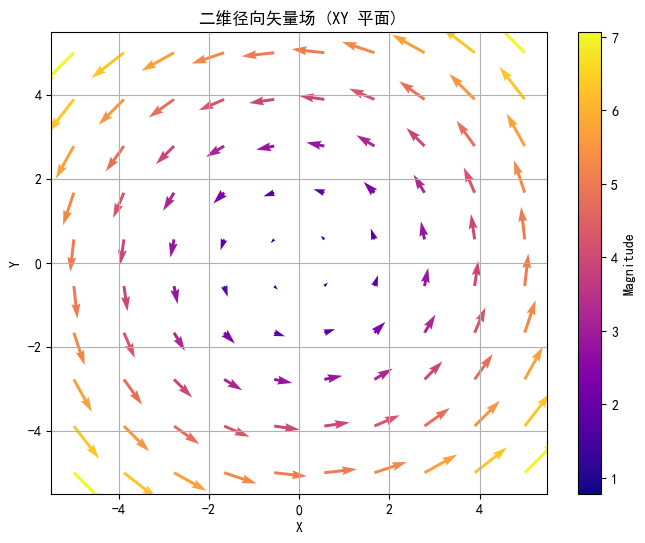

In [8]:
import numpy as np
import sympy as sp
from sympy.vector import CoordSys3D, curl
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib import rcParams
# 设置字体，防止中文乱码
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号无法正常显示的问题

# 定义矢量场函数
def vector_field(x_vals, y_vals, z_vals):
    
    # 创建一个三维坐标系
    N = CoordSys3D('N')
    # 定义矢量场
    A = (-N.y) * N.i + N.x * N.j 
    print('矢量场：')
    display(A)
    
    # 计算矢量场的旋度
    curl_A = curl(A)
    print('矢量场的旋度：')
    display(curl_A)
    
    # 提取矢量场 A 在 x, y, z 方向的分量
    Ax = A & N.i
    Ay = A & N.j
    Az = A & N.k
    # 计算 x, y, z 方向的分量
    A_x = np.zeros_like(x_vals, dtype=float)
    A_y = np.zeros_like(y_vals, dtype=float)
    A_z = np.zeros_like(z_vals, dtype=float)
    
    for i in range(x_vals.shape[0]):
        for j in range(x_vals.shape[1]):
            for k in range(x_vals.shape[2]):
                A_x[i, j, k] = float(Ax.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_y[i, j, k] = float(Ay.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_z[i, j, k] = float(Az.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
    return A_x, A_y, A_z

# 创建网格点
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
z = np.linspace(1, 1, 1)
X, Y, Z = np.meshgrid(x, y, z)

# 计算每个网格点的矢量场分量
A_x, A_y, A_z = vector_field(X, Y, Z)

# 绘制矢量场
plt.figure(figsize=(8, 6))
plt.quiver(X[:, :, 0], Y[:, :, 0], A_x[:, :, 0], A_y[:, :, 0], np.sqrt(A_x[:, :, 0]**2 + A_y[:, :, 0]**2), cmap='plasma')
plt.colorbar(label='Magnitude')
plt.title('二维径向矢量场 (XY 平面)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [9]:
# 创建一个三维坐标系
N = CoordSys3D('N')
# 定义矢量场
A = (-N.y) * N.i + N.x * N.j 
print('矢量场：')
display(A)

# 计算矢量场的旋度
curl_A = curl(A)
print('矢量场的旋度：')
display(curl_A)

矢量场：


(-N.y)*N.i + N.x*N.j

矢量场的旋度：


2*N.k

In [13]:
# 计算矢量场沿着圆周线的线积分

# 定义路径参数化
t = sp.symbols('t')
x_t = 5 * sp.cos(t)
y_t = 5 * sp.sin(t)
z_t = 0  # 在平面上的路径

# 将路径参数化代入梯度场
A_along_path = A.subs({N.x: x_t, N.y: y_t, N.z: z_t})
print('路径上的矢量场')
display(A_along_path)

# 计算路径的微分元素 dr/dt
dx_dt = sp.diff(x_t, t)
dy_dt = sp.diff(y_t, t)
dz_dt = sp.diff(z_t, t)

# 微分向量 dl
dl = dx_dt * N.i + dy_dt * N.j + dz_dt * N.k

print('路径上的微元：')
display(dl)

# 计算梯度场与路径微分 dr 的点积
integrand = A_along_path.dot(dl)
print('最后的被积函数的形式：')
display(integrand)

# 计算线积分 ∫∇f · dr，积分范围 t ∈ [0, π]
line_integral_symbolic = sp.simplify(sp.integrate(integrand, (t, 0, 2*  sp.pi)))

# 输出符号线积分结果
print("\n符号线积分结果:")
display(line_integral_symbolic)

# 计算具体数值
line_integral_numeric = line_integral_symbolic.evalf(chop=True)

print("\n线积分的数值结果:")
display(line_integral_numeric)

路径上的矢量场


(-5*sin(t))*N.i + (5*cos(t))*N.j

路径上的微元：


(-5*sin(t))*N.i + (5*cos(t))*N.j

最后的被积函数的形式：


25*sin(t)**2 + 25*cos(t)**2


符号线积分结果:


50*pi


线积分的数值结果:


157.079632679490

In [20]:
# 计算矢量场旋度在周线所围曲面上的面积分
R = 5
# 将直角坐标转换为球坐标
r, theta, phi = sp.symbols('r theta phi')
# 面积微分元素为 r^2 sin\theta d\theta d\phi
area_element = r
print('面积微分元素为：')
display(area_element * N.k)
r_field_hat = N.k
# 在球坐标中表示向量场


A_stand = curl_A.subs({N.x: r * sp.sin(theta) * sp.cos(phi), N.y: r * sp.sin(theta) * sp.sin(phi), N.z: r * sp.cos(theta)})
print('面积微元处场的代表向量为：')
display(A_stand)

# 被积函数为 A · r_hat
print('被积函数为：')
integrand = area_element * (A_stand & r_field_hat)
display(integrand)

# 计算单位圆内的面积分，theta 的范围是 0 到 pi，phi 的范围是 0 到 2pi
area_integral = sp.integrate(integrand , (r, 0, R), (phi, 0, 2 * sp.pi))

# 输出面积分结果
print("面积分结果:")
display(area_integral)

面积微分元素为：


r*N.k

面积微元处场的代表向量为：


2*N.k

被积函数为：


2*r

面积分结果:


50*pi